In [885]:
import cv2
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.ndimage import median_filter

#### 2D Convolution

In [886]:
def convolution2D(image, kernel, stride, padding):
    """
    Thực hiện phép tích chập 2D trên ảnh đầu vào sử dụng kernel cho trước.

    Parameters:
        image (ndarray): Mảng 2D đại diện cho ảnh đầu vào.
        kernel (ndarray): Mảng 2D đại diện cho kernel.
        stride (int): Bước nhảy khi thực hiện tích chập.
        padding (int): Số lượng pixel được thêm vào viền ảnh.

    Returns:
        ndarray: Mảng 2D đại diện cho ảnh sau khi áp dụng phép tích chập.

    """
    
    # thêm padding cho ảnh đầu vào
    image = np.pad(image, [(padding, padding), (padding, padding)], mode='constant', constant_values=0)

    kernel_height, kernel_width = kernel.shape
    padded_height, padded_width = image.shape

    # tính toán kích thước của ảnh đầu ra
    output_height = (padded_height - kernel_height) // stride + 1
    output_width = (padded_width - kernel_width) // stride + 1

    # khởi tạo ma trận đầu ra
    new_image = np.zeros((output_height, output_width))

    # tính tích chập
    for y in range(0, output_height):
        for x in range(0, output_width):
            new_image[y][x] = np.sum(image[y * stride:y * stride + kernel_height, x * stride:x * stride + kernel_width] * kernel)
    return new_image.astype(np.int8)

##### Khởi tạo ảnh mẫu

In [887]:
part1 = np.array([[0., 0., 0., 1., 1., 2., 2., 3., 3., 4., 4., 5., 5., 6., 6., 7.],
                  [0., 0., 0., 1., 1., 2., 2., 3., 3., 4., 4., 5., 5., 6., 6., 7.],
                  [0., 0., 0., 1., 1., 2., 2., 3., 3., 4., 4., 5., 5., 6., 6., 7.],
                  [0., 0., 0., 1., 1., 2., 2., 3., 3., 4., 4., 5., 5., 5., 5., 5.],
                  [0., 0., 0., 1., 1., 2., 2., 3., 3., 4., 4., 5., 5., 5., 5., 5.],
                  [0., 0., 0., 1., 1., 2., 2., 3., 3., 4., 4., 4., 4., 4., 4., 4.],
                  [0., 0., 0., 1., 1., 2., 2., 3., 3., 4., 4., 4., 4., 4., 4., 4.],
                  [0., 0., 0., 1., 1., 2., 2., 3., 3., 3., 3., 3., 3., 3., 3., 3.],
                  [0., 0., 0., 1., 1., 2., 2., 3., 3., 3., 3., 3., 3., 3., 3., 3.],
                  [0., 0., 0., 1., 1., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2.],
                  [0., 0., 0., 1., 1., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2.],
                  [0., 0., 0., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.],
                  [0., 0., 0., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.],
                  [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
                  [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
                  [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.]])
part1 = np.rot90(part1, -1)

part2 = np.array([[0., 0., 0., 1., 1., 2., 2., 3., 3., 4., 4., 5., 5., 6., 6., 0.],
                  [0., 0., 0., 1., 1., 2., 2., 3., 3., 4., 4., 5., 5., 6., 0., 7.],
                  [0., 0., 0., 1., 1., 2., 2., 3., 3., 4., 4., 5., 5., 0., 6., 7.],
                  [0., 0., 0., 1., 1., 2., 2., 3., 3., 4., 4., 5., 0., 5., 5., 5.],
                  [0., 0., 0., 1., 1., 2., 2., 3., 3., 4., 4., 0., 5., 5., 5., 5.],
                  [0., 0., 0., 1., 1., 2., 2., 3., 3., 4., 1., 4., 4., 4., 4., 4.],
                  [0., 0., 0., 1., 1., 2., 2., 3., 3., 1., 4., 4., 4., 4., 4., 4.],
                  [0., 0., 0., 1., 1., 2., 2., 3., 1., 3., 3., 3., 3., 3., 3., 3.],
                  [0., 0., 0., 1., 1., 2., 2., 1., 3., 3., 3., 3., 3., 3., 3., 3.],
                  [0., 0., 0., 1., 1., 2., 6., 2., 2., 2., 2., 2., 2., 2., 2., 2.],
                  [0., 0., 0., 1., 1., 6., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2.],
                  [0., 0., 0., 1., 7., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.],
                  [0., 0., 0., 7., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.],
                  [0., 0., 7., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
                  [0., 7., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
                  [7., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.]])

part3 = np.rot90(part1, -1)
part4 = np.rot90(part2, 1)

img = np.concatenate((np.concatenate((part1, part3), axis=1), np.concatenate((part2, part4), axis=1)), axis=0)

In [888]:
img = img // 2
img

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 3., ..., 3., 0., 0.],
       [0., 3., 0., ..., 0., 3., 0.],
       [3., 0., 0., ..., 0., 0., 3.]])

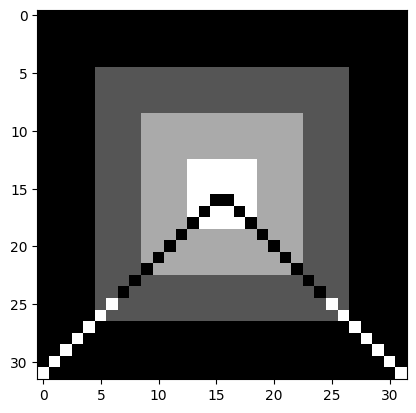

In [889]:
plt.imshow(img, cmap='gray')

##### Khởi tạo kernel

In [890]:
kernel1_a = np.array([[1, 0, -1], 
                      [1, 0, -1], 
                      [1, 0, -1]])
kernel1_b = np.rot90(kernel1_a, 2)

kernel2_a = np.array([[-1, -1, -1], 
                      [0, 0, 0], 
                      [1, 1, 1]])
kernel2_b = np.rot90(kernel2_a, 2)

kernel3_a = np.array([[1, 0, -1], 
                    [0, 1, 0], 
                    [-1, 0, 1]]) 
kernel3_b = np.rot90(kernel3_a, 1)

kernel4_a = np.array([[0, 1, 0], 
                      [1, 5, 1], 
                      [0, 1, 0]])
kernel4_b = np.array([[1, 1, 1], 
                      [1, 5, 1], 
                      [1, 1, 1]])

kernel5_a = np.ones((3, 3)) / 9 + np.array([[0, 0, 0], 
                                            [0, 2, 0], 
                                            [0, 0, 0]])
kernel5_b = np.ones((5, 5)) / 25 + np.array([[0, 0, 0, 0, 0], 
                                             [0, 0, 0, 0, 0],
                                             [0, 0, 2, 0, 0],
                                             [0, 0, 0, 0, 0], 
                                             [0, 0, 0, 0, 0]])
kernel5_c = np.ones((7, 7)) / 25 + np.array([[0, 0, 0, 0, 0, 0, 0], 
                                             [0, 0, 0, 0, 0, 0, 0],
                                             [0, 0, 0, 0, 0, 0, 0],
                                             [0, 0, 0, 2, 0, 0, 0],
                                             [0, 0, 0, 0, 0, 0, 0],
                                             [0, 0, 0, 0, 0, 0, 0],
                                             [0, 0, 0, 0, 0, 0, 0]])

##### Triển

Đường dọc

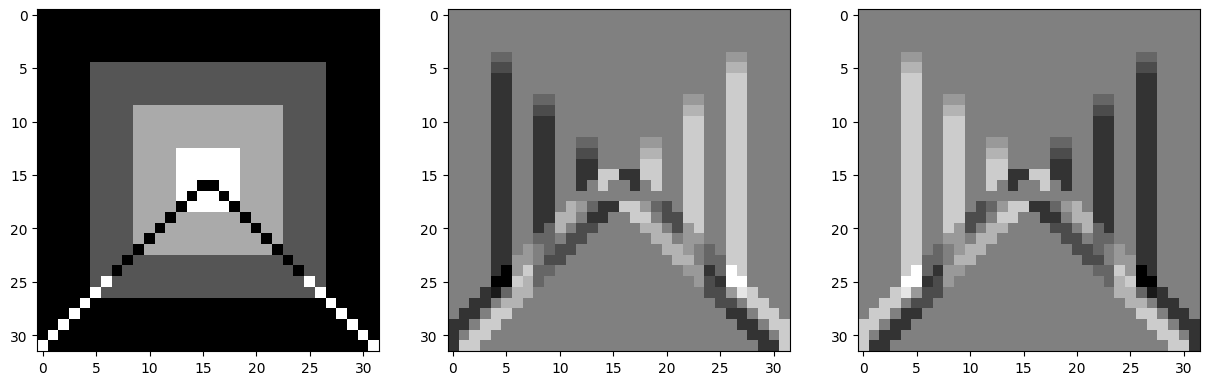

In [891]:
plt.figure(figsize=(15, 5))

plt.subplot(1, 3, 1)
plt.imshow(img, cmap='gray')

plt.subplot(1, 3, 2)
conv_img = convolution2D(img, kernel1_a, 1, 1)
plt.imshow(conv_img, cmap='gray')

plt.subplot(1, 3, 3)
conv_img = convolution2D(img, kernel1_b, 1, 1)
plt.imshow(conv_img, cmap='gray')

Đường ngang

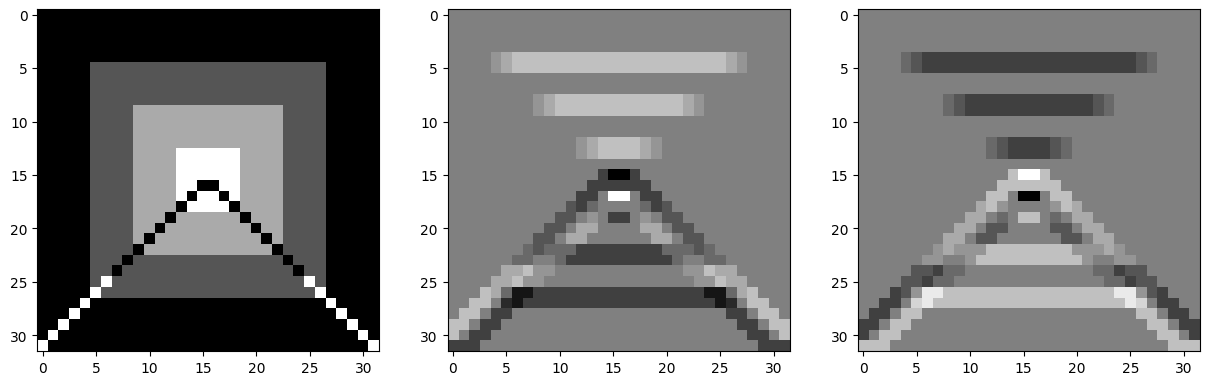

In [892]:
plt.figure(figsize=(15, 5))

plt.subplot(1, 3, 1)
plt.imshow(img, cmap='gray')

plt.subplot(1, 3, 2)
conv_img = convolution2D(img, kernel2_a, 1, 1)
plt.imshow(conv_img, cmap='gray')

plt.subplot(1, 3, 3)
conv_img = convolution2D(img, kernel2_b, 1, 1)
plt.imshow(conv_img, cmap='gray')

Đường chéo

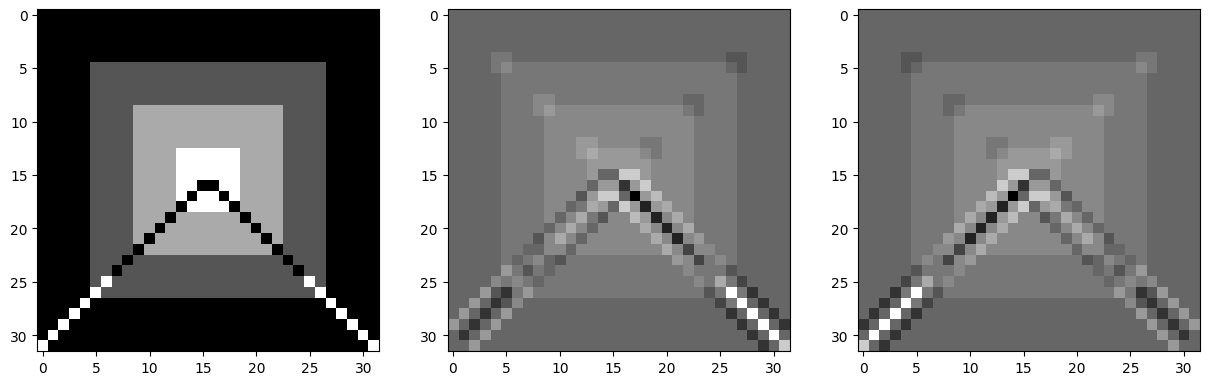

In [893]:
plt.figure(figsize=(15, 5))

plt.subplot(1, 3, 1)
plt.imshow(img, cmap='gray')

plt.subplot(1, 3, 2)
conv_img = convolution2D(img, kernel3_a, 1, 1)
plt.imshow(conv_img, cmap='gray')

plt.subplot(1, 3, 3)
conv_img = convolution2D(img, kernel3_b, 1, 1)
plt.imshow(conv_img, cmap='gray')

Gaussian Blurring

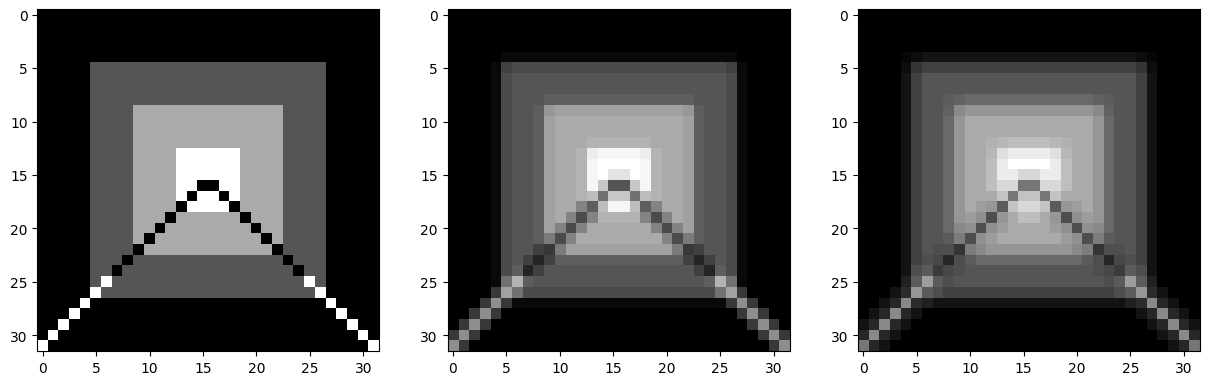

In [894]:
plt.figure(figsize=(15, 5))

plt.subplot(1, 3, 1)
plt.imshow(img, cmap='gray')

plt.subplot(1, 3, 2)
conv_img = convolution2D(img, kernel4_a, 1, 1)
plt.imshow(conv_img, cmap='gray')

plt.subplot(1, 3, 3)
conv_img = convolution2D(img, kernel4_b, 1, 1)
plt.imshow(conv_img, cmap='gray')

Median Blurring + Gaussian và Bilateral Filter

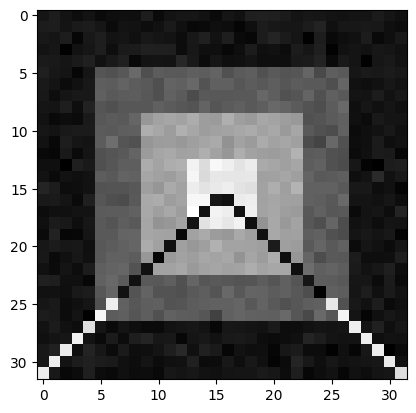

In [895]:
# Thêm noise vào ảnh
noisy_img = img.copy()
noise = np.random.normal(0, 1, img.shape)
noisy_img = noisy_img + 0.1 * noise

plt.imshow(noisy_img, cmap='gray')

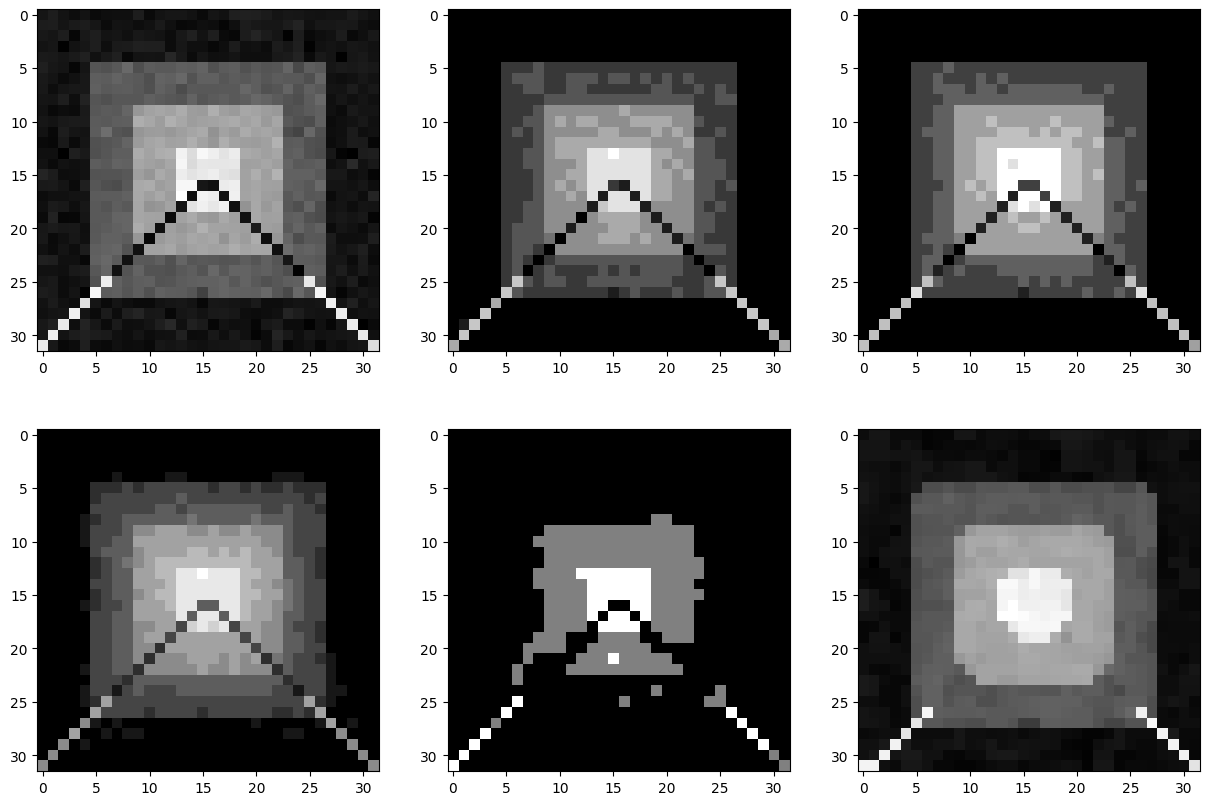

In [896]:
plt.figure(figsize=(15, 10))

plt.subplot(2, 3, 1)
plt.imshow(noisy_img, cmap='gray')

plt.subplot(2, 3, 2)
conv_img = convolution2D(noisy_img, kernel5_a, 1, 1)
plt.imshow(conv_img, cmap='gray')

plt.subplot(2, 3, 3)
conv_img = convolution2D(noisy_img, kernel5_b, 1, 2)
plt.imshow(conv_img, cmap='gray')

plt.subplot(2, 3, 4)
conv_img = convolution2D(noisy_img, kernel5_c, 1, 3)
plt.imshow(conv_img, cmap='gray')

plt.subplot(2, 3, 5)
filtered_img = cv2.bilateralFilter(noisy_img.astype(np.uint8), d=1, sigmaColor=1, sigmaSpace=1)
plt.imshow(filtered_img, cmap='gray')

plt.subplot(2, 3, 6)
filtered_img = median_filter(noisy_img, size=2)
plt.imshow(filtered_img, cmap='gray')